In [ ]:
import numpy as np

class Counter(dict):
    def increment(self, item, delta = 1):
        new_val = delta + self.pop(item, 0)
        if new_val > 0:
            self[item] = new_val
        

def y(x):
    return 2**x

def find_tranformation_matrix(b, E, N, Tmax, stopping_crit = 0):

    M = np.shape(E)[0]
    ## find the number of events that occur in the interval from T = 0 to T = Tmax
    n = np.random.poisson(lam = Tmax*(N+b*M))

    ## find times for all events
    times = np.sort(np.random.uniform(0, Tmax, n))
    R = np.zeros(n, dtype = int)

    ##making a spatial plot
    spatial1 = np.zeros(n, dtype = int)
    spatial2 = np.zeros(n, dtype = int)
    
    X = [2**i for i in range(N)][::-1]

    counts = Counter()
    for element in X:
        counts.increment(element, 1)

    # run simulation
    for t in range(n):
        
        if np.random.random() < N/(N + b*M):

            i = np.random.randint(N)

            if X[i] != 0:
                
                counts.increment(X[i], -1)

                X[i] = 0

                counts.increment(0, 1)
        else:

            i,j = E[np.random.randint(M)]

            if (X[i] != 0 or X[j] != 0) and X[i] != X[j]:
                    
                new = X[i] | X[j]
                counts.increment(X[i], -1)
                counts.increment(X[j], -1)
                counts.increment(new, 2)
                X[i] = X[j] = new
                
        R[t] = non_zero_distinct_rows = len(counts) - (0 in counts)
        
        ## make duplicate dicionary to edit
        sorted_counts = counts
        ## will never have 0 be the most commonly occuring 
        if 0 in sorted_counts:
            del sorted_counts[0]
        ## sort the dictionary by the number of occurences
        sorted_counts = sorted(sorted_counts.items(), key=lambda item: item[1], reverse=True)
        ## most commonly occuring
        if len(sorted_counts) == 0:
            spatial1[t] = 0
        else:
            spatial1[t] = sorted_counts[0][1]
        ## second most commonly occuring
        if len(sorted_counts) == 1 or len(sorted_counts) == 0:
            spatial2[t] = 0
        else:
            spatial2[t] = sorted_counts[1][1]
        
        ## break the simulation because the pseudo mixing time has been found (the number of distinct rows and thus distinct columns is 2 or extinction, depending)

        if non_zero_distinct_rows == stopping_crit:
            times = times[:t+1]
            R = R[:t+1]
            break

    return times, R, spatial1, spatial2


In [21]:
import numpy as np

class Counter(dict):
    def increment(self, item, delta = 1):
        new_val = delta + self.pop(item, 0)
        if new_val > 0:
            self[item] = new_val

def y(x):
    return 2**x

def find_tranformation_matrix(b, E, N, Tmax, stopping_crit = 0):

    M = np.shape(E)[0]
    ## find the number of events that occur in the interval from T = 0 to T = Tmax
    n = np.random.poisson(lam = Tmax*(N+b*M))

    ## find times for all events
    times = np.sort(np.random.uniform(0, Tmax, n))
    R = np.zeros(n, dtype = int)

    ##making a spatial plot
    spatial1 = np.zeros(n, dtype = int)
    spatial2 = np.zeros(n, dtype = int)
    
    X = [2**i for i in range(N)][::-1]

    counts = Counter()
    for element in X:
        counts.increment(element, 1)

    # run simulation
    for t in range(n):
        
        if np.random.random() < N/(N + b*M):

            i = np.random.randint(N)

            if X[i] != 0:
                
                counts.increment(X[i], -1)

                X[i] = 0

                counts.increment(0, 1)
        else:

            i,j = E[np.random.randint(M)]

            if (X[i] != 0 or X[j] != 0) and X[i] != X[j]:
                    
                new = X[i] | X[j]
                counts.increment(X[i], -1)
                counts.increment(X[j], -1)
                counts.increment(new, 2)
                X[i] = X[j] = new
                
        R[t] = non_zero_distinct_rows = len(counts) - (0 in counts)
        
        ## make duplicate dicionary to edit
        sorted_counts = counts
        ## will never have 0 be the most commonly occuring 
        if 0 in sorted_counts:
            del sorted_counts[0]
        ## sort the dictionary by the number of occurences
        sorted_counts = sorted(sorted_counts.items(), key=lambda item: item[1], reverse=True)
        ## most commonly occuring
        if len(sorted_counts) == 0:
            spatial1[t] = 0
        else:
            spatial1[t] = sorted_counts[0][1]
        ## second most commonly occuring
        if len(sorted_counts) == 1 or len(sorted_counts) == 0:
            spatial2[t] = 0
        else:
            spatial2[t] = sorted_counts[1][1]
        
        ## break the simulation because the pseudo mixing time has been found (the number of distinct rows and thus distinct columns is 2 or extinction, depending)

        if non_zero_distinct_rows == stopping_crit:
            times = times[:t+1]
            R = R[:t+1]
            break

    return times, R, spatial1, spatial2


In [23]:
N =  4000
M = 3*N
Tmax = 500
## at the transition -- try again with the epidemic 
b = np.linspace(0.002, 0.5, 10)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

## run all the way to extinction time
## average over 10 trials per value of b
## find peak of the spatial1 and spatial2 lists
## plot these maximum points against the b values

s1 = []
s2 = []
for i in range(len(b)):
    maxs1 = 0
    maxs2 = 0
    for j in range(5):
        times, R, spatial1, spatial2 = find_tranformation_matrix(b[i], E, N, Tmax, 0)
        max_t = np.argmax(spatial1)
        maxs1 += spatial1[max_t]
        ## way to check s2 value at the time of max[s1]
        # maxs2 += spatial2[max_t]
        ## print to check progress! 
    print(maxs2/5)
    s1.append(maxs1/5)
    s2.append(maxs2/5)

print(s1)
print(s2)



1.0
2.4
5.7
23.1
144.6
144.7
223.1
212.9
289.0
366.4
[2.6, 6.2, 16.2, 97.8, 1057.8, 1618.2, 1980.2, 2260.4, 2466.0, 2626.4]
[2.0, 4.8, 11.4, 46.2, 289.2, 289.4, 446.2, 425.8, 578.0, 732.8]


In [24]:
s1 = [2.6, 6.2, 16.2, 97.8, 1057.8, 1618.2, 1980.2, 2260.4, 2466.0, 2626.4]
s2 = [2.0, 4.8, 11.4, 46.2, 289.2, 289.4, 446.2, 425.8, 578.0, 732.8]

In [25]:
b = np.linspace(0.6, 5, 7)

## run all the way to extinction time
## average over 10 trials per value of b
## find peak of the spatial1 and spatial2 lists
## plot these maximum points against the b values

s1 = []
s2 = []
for i in range(len(b)):
    maxs1 = 0
    maxs2 = 0
    for j in range(5):
        times, R, spatial1, spatial2 = find_tranformation_matrix(b[i], E, N, Tmax, 0)
        maxs1 += max(spatial1)
        maxs2 += max(spatial2)
        ## print to check progress! 
    print(maxs2/5)
    s1.append(maxs1/5)
    s2.append(maxs2/5)

print(s1)
print(s2)

750.6
680.0
1345.4
1481.6
1836.6
1358.8
1865.2
[2859.8, 3491.4, 3681.2, 3772.0, 3820.2, 3857.8, 3877.0]
[750.6, 680.0, 1345.4, 1481.6, 1836.6, 1358.8, 1865.2]


In [ ]:
list1 = [2859.8, 3491.4, 3681.2, 3772.0, 3820.2, 3857.8, 3877.0]
list2 = [750.6, 680.0, 1345.4, 1481.6, 1836.6, 1358.8, 1865.2]

In [26]:
b = np.linspace(0.002, 0.5, 15)

p_mixing_times = []

for i in range(len(b)):
    t_p_mixing = 0
    for j in range(10):
        times, R, spatial1, spatial2 = find_tranformation_matrix(b[i], E, N, Tmax, 1)
        p_mix_index = np.min(np.where(R==1)[0])
        t_p_mixing += times[p_mix_index]
    p_mixing_times.append(t_p_mixing/10)
    print(t_p_mixing/10)

print(p_mixing_times)


7.751748568551108
9.45993958533381
12.081906875690484
17.55248686975319
31.637600344297635
137.22999320855098
66.505733880614
43.63438217785343
32.83415918466914
26.80972008863123
22.839135578870234
20.70140647575661
18.292690855893156
15.754909890502523
14.819290927890577
[7.751748568551108, 9.45993958533381, 12.081906875690484, 17.55248686975319, 31.637600344297635, 137.22999320855098, 66.505733880614, 43.63438217785343, 32.83415918466914, 26.80972008863123, 22.839135578870234, 20.70140647575661, 18.292690855893156, 15.754909890502523, 14.819290927890577]


In [ ]:
ptimes  = [7.751748568551108, 9.45993958533381, 12.081906875690484, 17.55248686975319, 31.637600344297635, 137.22999320855098, 66.505733880614, 43.63438217785343, 32.83415918466914, 26.80972008863123, 22.839135578870234, 20.70140647575661, 18.292690855893156, 15.754909890502523, 14.819290927890577]

Prior was s1* and s2*, now we are going to do S1 and S2. Changing the function, but not changing E for accurate results!

In [27]:
import numpy as np

class Counter(dict):
    def increment(self, item, delta = 1):
        new_val = delta + self.pop(item, 0)
        if new_val > 0:
            self[item] = new_val

def y(x):
    return 2**x

def find_tranformation_matrix(b, E, N, Tmax, stopping_crit = 0):

    M = np.shape(E)[0]
    ## find the number of events that occur in the interval from T = 0 to T = Tmax
    n = np.random.poisson(lam = Tmax*(N+b*M))

    ## find times for all events
    times = np.sort(np.random.uniform(0, Tmax, n))
    R = np.zeros(n, dtype = int)

    ##making a spatial plot
    spatial1 = np.zeros(n, dtype = int)
    spatial2 = np.zeros(n, dtype = int)
    
    X = [2**i for i in range(N)][::-1]

    counts = Counter()
    for element in X:
        counts.increment(element, 1)

    # run simulation
    for t in range(n):
        
        if np.random.random() < N/(N + b*M):

            i = np.random.randint(N)

            if X[i] != 0:
                
                counts.increment(X[i], -1)

                X[i] = 0

                counts.increment(0, 1)
        else:

            i,j = E[np.random.randint(M)]

            if (X[i] != 0 or X[j] != 0) and X[i] != X[j]:
                    
                new = X[i] | X[j]
                counts.increment(X[i], -1)
                counts.increment(X[j], -1)
                counts.increment(new, 2)
                X[i] = X[j] = new
                
        R[t] = non_zero_distinct_rows = len(counts) - (0 in counts)
        
        ## make duplicate dicionary to edit
        sorted_counts = counts
        ## we are not deleting the zero entries this time!
        # if 0 in sorted_counts:
        #     del sorted_counts[0]
        ## sort the dictionary by the number of occurences
        sorted_counts = sorted(sorted_counts.items(), key=lambda item: item[1], reverse=True)
        ## most commonly occuring
        if len(sorted_counts) == 0:
            spatial1[t] = 0
        else:
            spatial1[t] = sorted_counts[0][1]
        ## second most commonly occuring
        if len(sorted_counts) == 1 or len(sorted_counts) == 0:
            spatial2[t] = 0
        else:
            spatial2[t] = sorted_counts[1][1]
        
        ## break the simulation because the pseudo mixing time has been found (the number of distinct rows and thus distinct columns is 2 or extinction, depending)

        if non_zero_distinct_rows == stopping_crit:
            times = times[:t+1]
            R = R[:t+1]
            break

    return times, R, spatial1, spatial2


In [28]:
b = np.linspace(0.002, 0.5, 10)

## run all the way to extinction time
## average over 10 trials per value of b
## find peak of the spatial1 and spatial2 lists
## plot these maximum points against the b values

s1 = []
s2 = []
for i in range(len(b)):
    maxs1 = 0
    maxs2 = 0
    for j in range(5):
        times, R, spatial1, spatial2 = find_tranformation_matrix(b[i], E, N, Tmax, 0)
        maxs1 += max(spatial1)
        maxs2 += max(spatial2)
        ## print to check progress! 
    print(maxs2/5)
    s1.append(maxs1/5)
    s2.append(maxs2/5)

print(s1)
print(s2)

2.2
6.8
15.2
92.4
1057.0
1600.2
1991.0
2000.0
1824.2
1642.0
[4000.0, 4000.0, 4000.0, 4000.0, 3284.6, 2722.2, 2336.4, 2255.0, 2463.0, 2647.0]
[2.2, 6.8, 15.2, 92.4, 1057.0, 1600.2, 1991.0, 2000.0, 1824.2, 1642.0]


In [29]:
b = np.linspace(0.6, 5, 7)

## run all the way to extinction time
## average over 10 trials per value of b
## find peak of the spatial1 and spatial2 lists
## plot these maximum points against the b values

s1 = []
s2 = []
for i in range(len(b)):
    maxs1 = 0
    maxs2 = 0
    for j in range(5):
        times, R, spatial1, spatial2 = find_tranformation_matrix(b[i], E, N, Tmax, 0)
        maxs1 += max(spatial1)
        maxs2 += max(spatial2)
        ## print to check progress! 
    print(maxs2/5)
    s1.append(maxs1/5)
    s2.append(maxs2/5)

print(s1)
print(s2)

1410.4
1265.8
1087.6
1288.6
1471.4
1516.0
1509.6
[2855.8, 3492.2, 3679.6, 3772.4, 3821.0, 3855.0, 3879.0]
[1410.4, 1265.8, 1087.6, 1288.6, 1471.4, 1516.0, 1509.6]


Plot Results:

In [32]:
b = [0.002, 0.05733333, 0.11266667, 0.168, 0.22333333, 0.27866667, 0.334, 0.38933333, 0.44466667, 0.5, 0.6, 1.33333333, 2.06666667, 2.8,  3.53333333, 4.26666667, 5 ]
s1star = [2.6, 6.2, 16.2, 97.8, 1057.8, 1618.2, 1980.2, 2260.4, 2466.0, 2626.4,2859.8, 3491.4, 3681.2, 3772.0, 3820.2, 3857.8, 3877.0]
s2star = [2.0, 4.8, 11.4, 46.2, 289.2, 289.4, 446.2, 425.8, 578.0, 732.8, 750.6, 680.0, 1345.4, 1481.6, 1836.6, 1358.8, 1865.2]
s1 = [4000.0, 4000.0, 4000.0, 4000.0, 3284.6, 2722.2, 2336.4, 2255.0, 2463.0, 2647.0, 2855.8, 3492.2, 3679.6, 3772.4, 3821.0, 3855.0, 3879.0]
s2 = [2.2, 6.8, 15.2, 92.4, 1057.0, 1600.2, 1991.0, 2000.0, 1824.2, 1642.0, 1410.4, 1265.8, 1087.6, 1288.6, 1471.4, 1516.0, 1509.6]

In [36]:
btimes = np.linspace(0.002, 0.5, 15)

pmixing = [7.751748568551108, 9.45993958533381, 12.081906875690484, 17.55248686975319, 31.637600344297635, 137.22999320855098, 66.505733880614, 43.63438217785343, 32.83415918466914, 26.80972008863123, 22.839135578870234, 20.70140647575661, 18.292690855893156, 15.754909890502523, 14.819290927890577]

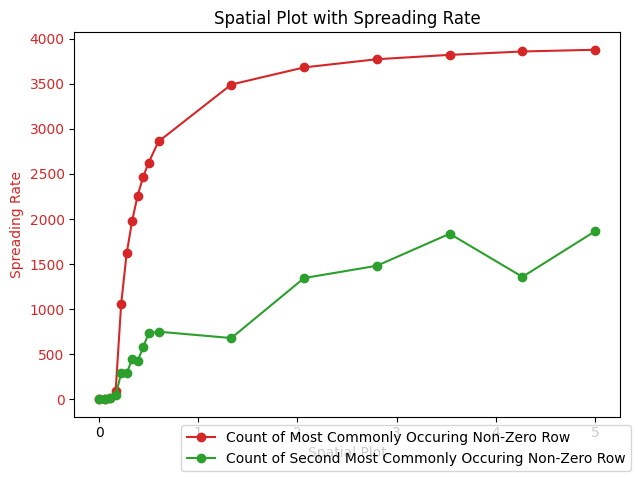

In [33]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Spatial Plot')
ax1.set_ylabel('Spreading Rate', color=color)
ax1.plot(b, s1star, color=color, marker = 'o', label= 'Count of Most Commonly Occuring Non-Zero Row')
ax1.tick_params(axis='y', labelcolor=color)
color = 'tab:green'
ax1.plot(b, s2star, color=color, marker = 'o', label= 'Count of Second Most Commonly Occuring Non-Zero Row')

fig.legend(loc = 'lower right')
plt.title('Spatial Plot with Spreading Rate')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


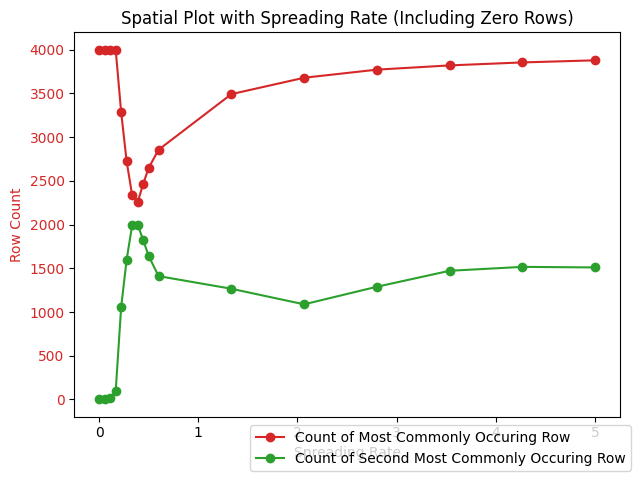

In [40]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Spreading Rate')
ax1.set_ylabel('Row Count', color=color)
ax1.plot(b, s1, color=color, marker = 'o', label= 'Count of Most Commonly Occuring Row')
ax1.tick_params(axis='y', labelcolor=color)
color = 'tab:green'
ax1.plot(b, s2, color=color, marker = 'o', label= 'Count of Second Most Commonly Occuring Row')

fig.legend(loc = 'lower right')
plt.title('Spatial Plot with Spreading Rate (Including Zero Rows)')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


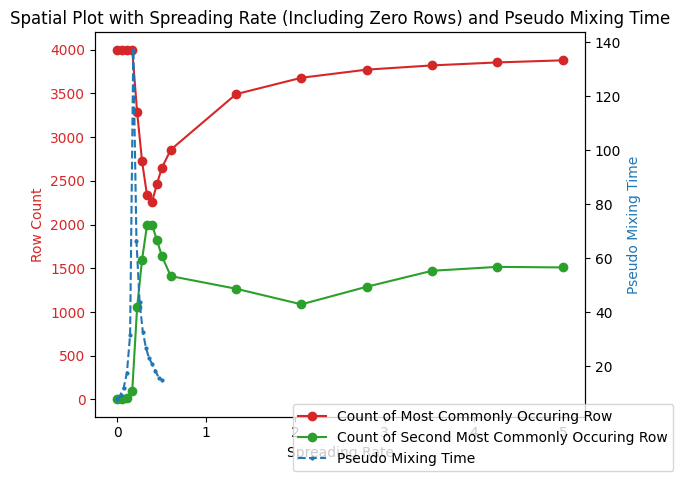

In [42]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Spreading Rate')
ax1.set_ylabel('Row Count', color=color)
ax1.plot(b, s1, color=color, marker = 'o', label= 'Count of Most Commonly Occuring Row')
ax1.tick_params(axis='y', labelcolor=color)
color = 'tab:green'
ax1.plot(b, s2, color=color, marker = 'o', label= 'Count of Second Most Commonly Occuring Row')
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(btimes, pmixing, color=color, marker = 'o', markersize = 2, label= 'Pseudo Mixing Time', linestyle = '--')
ax2.set_ylabel('Pseudo Mixing Time', color=color)
fig.legend(loc = 'lower right')
plt.title('Spatial Plot with Spreading Rate (Including Zero Rows) and Pseudo Mixing Time')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


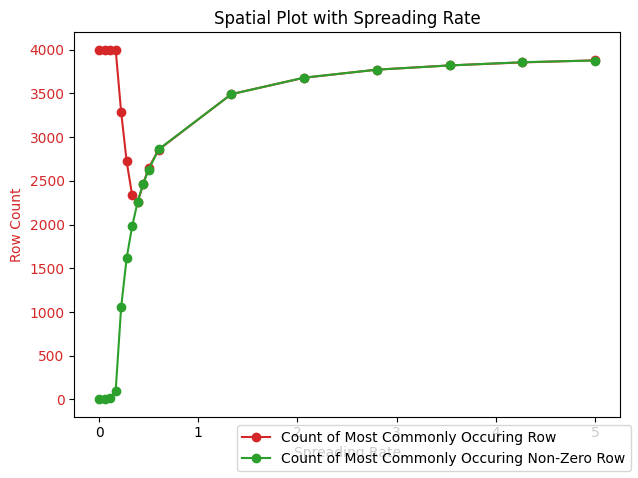

In [44]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Spreading Rate')
ax1.set_ylabel('Row Count', color=color)
ax1.plot(b, s1, color=color, marker = 'o', label= 'Count of Most Commonly Occuring Row')
ax1.tick_params(axis='y', labelcolor=color)
color = 'tab:green'
ax1.plot(b, s1star, color=color, marker = 'o', label= 'Count of Most Commonly Occuring Non-Zero Row')

fig.legend(loc = 'lower right')
plt.title('Spatial Plot with Spreading Rate')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [1]:
b = [0.002, 0.05733333, 0.11266667, 0.168, 0.22333333, 0.27866667, 0.334, 0.38933333, 0.44466667, 0.5, 0.6, 1.33333333, 2.06666667, 2.8,  3.53333333, 4.26666667, 5 ]
s1star = [2.6, 6.2, 16.2, 97.8, 1057.8, 1618.2, 1980.2, 2260.4, 2466.0, 2626.4,2859.8, 3491.4, 3681.2, 3772.0, 3820.2, 3857.8, 3877.0]
s2star = [2.0, 4.8, 11.4, 46.2, 289.2, 289.4, 446.2, 425.8, 578.0, 732.8, 750.6, 680.0, 1345.4, 1481.6, 1836.6, 1358.8, 1865.2]
s1 = [4000.0, 4000.0, 4000.0, 4000.0, 3284.6, 2722.2, 2336.4, 2255.0, 2463.0, 2647.0, 2855.8, 3492.2, 3679.6, 3772.4, 3821.0, 3855.0, 3879.0]
s2 = [2.2, 6.8, 15.2, 92.4, 1057.0, 1600.2, 1991.0, 2000.0, 1824.2, 1642.0, 1410.4, 1265.8, 1087.6, 1288.6, 1471.4, 1516.0, 1509.6]